<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [55]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
print(housing.head())

#Integridad de los datos
print(housing.isna().sum())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


### 1. Analisis del problema

En este problema se nos entregan algunos indicadores que se cree guardan relacion con el valor de un hogar en California, y el valor respectivo de este hogar. Lo que se busca es entrenar un modelo de predicción con los datos para lograr predecir el valor de un hogar, probablemente con el objetivo de no requerir un tazador de inmuebles.

### 2. Estadística descriptiva.



In [56]:
print(housing.describe() )

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

Todas las columnas son del tipo float, lo que tiene sentido pensando en la naturaleza de los valores. Tenemos tambien otra información, como  por ejemplo, que hay 20640 mediciones, y otras medidas estadísticas reelevantes para poder estandarizar la información en caso de ser necesario.

### 3. Visualización descriptiva
Ahora visualizaremos la frecuencia de los datos en histogramas, y haremos una matriz de covarianza para ver la dependencia entre una columna y otras. 

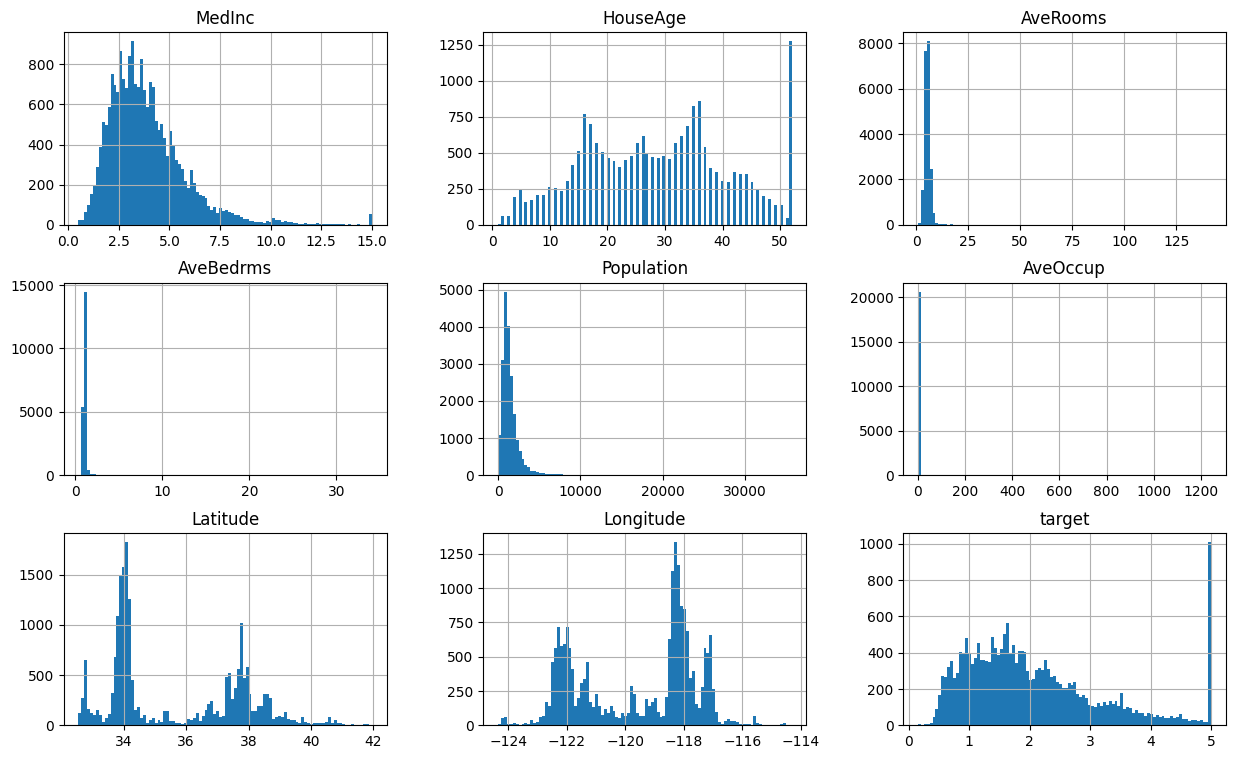

In [57]:
columnas = housing.iloc[0:2, :].columns

housing.iloc[:, :].hist(bins = 100, figsize= (15,9))
plt.show()

Aquí notamos que la mayor cantidad de hogares de esta muestra están ubicadas en la cercania de la latitud 34 y longitud -118. Además, los hogares en su gran mayoría tienen entre 2 y 3 habitaciones. La  edad de los hogares está bastante dispersa, pero hay sobre 12000 hogares con  más de 50 años.

<Axes: >

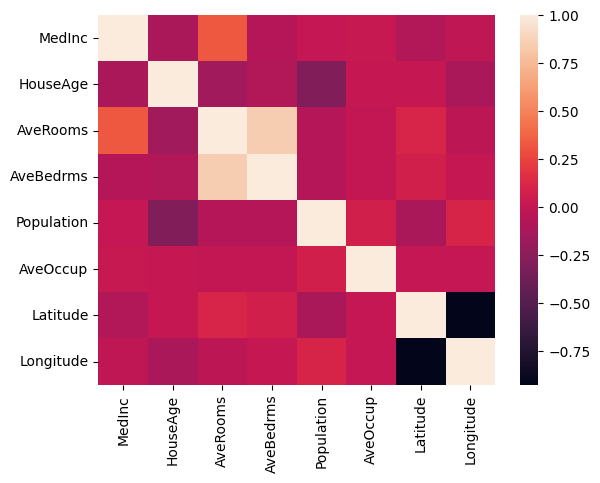

In [58]:
#Matriz de correlación
sns.heatmap((housing.iloc[:,:-1]).corr())


Aquí podemos notar que, más allá de la relación entre el promedio de cuartos y el promedio de habitaciones, ninguna  columna tiene una correlación muy alta. Sin embargo aparentemente La latitud tiene una correlación negativa, es  decir, tienen una relación inversa.

### 4. Preprocesamiento de datos

In [59]:
#Estandarizar y eliminar outliers, es decir, datos a más de 2 distribuciones estandar de distancia
columnas = housing.columns

for i in columnas:
    if i != columnas[-1]:
        housing[i] = (housing[i] - housing[i].mean())/housing[i].std()
        housing = housing[abs(housing[i]) < 2]
print((abs(housing) > 2).sum())

X = housing.iloc[:, :-1]
y = housing.iloc[:, -1]
print(X.head())


MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
target        7342
dtype: int64
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2  1.782656  1.860486  1.203416   0.044712   -0.860205 -0.132768  1.038441   
3  0.932945  1.860486  0.200402   0.041760   -0.804826 -0.377604  1.038441   
4 -0.012881  1.860486  0.388966   0.102957   -0.798574 -0.730421  1.038441   
5  0.087445  1.860486 -0.228156   0.274959   -0.934340 -0.770443  1.038441   
6 -0.111364  1.860486 -0.159044  -0.886665   -0.326071 -0.781506  1.033743   

   Longitude  
2  -1.382495  
3  -1.387617  
4  -1.387617  
5  -1.387617  
6  -1.387617  


/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_13460/2851295874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing[i] = (housing[i] - housing[i].mean())/housing[i].std()


## 5 y 6. Selección de Modelo y métricas de error.
Comparemos los modelos de Regresion Lineal, Arboles de Decisión, SVR y Random forests para regresión.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#Separar datos en test y train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=23)
#Regresion Lineal
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_p = LR.predict(X_test)
LR_df = pd.DataFrame({'y': y_test, 'yhat': LR_p})
LR_metrics = regression_metrics(LR_df)
print(LR_metrics)

#Arboles de desición
ADD= DecisionTreeRegressor()
ADD.fit(X_train,y_train)
ADD_p = ADD.predict(X_test)
ADD_df = pd.DataFrame({'y': y_test, 'yhat': ADD_p})
ADD_metrics = regression_metrics(ADD_df)
print(ADD_metrics)

#SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_p = svr.predict(X_test)
svr_df = pd.DataFrame({'y': y_test, 'yhat': svr_p})
svr_metrics = regression_metrics(svr_df)
print(svr_metrics)
#Random Forests parar regresión
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
RFR_p = RFR.predict(X_test)
RFR_df = pd.DataFrame({'y': y_test, 'yhat': RFR_p})
RFR_metrics = regression_metrics(RFR_df)
print(RFR_metrics)

      mae     mse    rmse     mape   smape
0  0.4824  0.4307  0.6563  28.8776  0.4481
      mae     mse    rmse     mape  smape
0  0.4412  0.4729  0.6877  23.1517  0.376
      mae     mse    rmse     mape   smape
0  0.3616  0.2983  0.5462  19.0716  0.3203
      mae     mse    rmse     mape   smape
0  0.3281  0.2559  0.5059  17.8278  0.3026


### Interpretacion y resultados

En general, el mejor modelo fue Random Forests para regresión. Esto se ve reflejado en las métricas, donde el modelo de Random Forests tiene un mejor desempeño para todas las métricas probadas.